# Deep Learning for Image Classification Assessment
# SOLUTION

Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [67]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.models import Sequential
import numpy as np 
from sklearn.metrics import classification_report

## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [68]:
(X_train, y_train),(X_test, y_test)  = fashion_mnist.load_data()

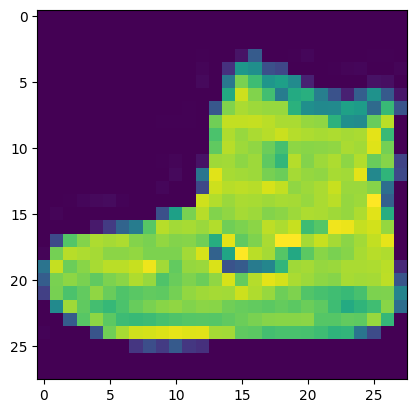

In [69]:
plt.imshow(X_train[0])

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [107]:
X_train = X_train/np.max(X_train)
X_train = X_train/np.max(X_test)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [70]:
X_train.shape

(60000, 28, 28)

In [71]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [72]:
X_train.shape

(60000, 28, 28, 1)

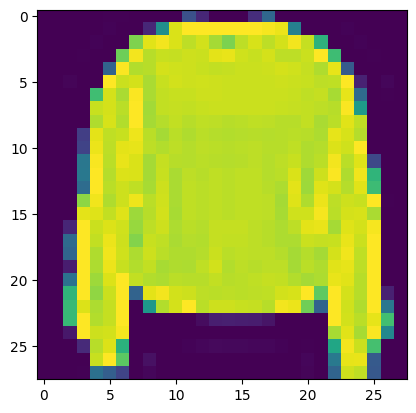

In [37]:
plt.imshow(X_train[7])

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [73]:
y_train_cat=to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [74]:
y_test_cat

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [75]:
fashion_model = Sequential()

In [76]:
fashion_model.add(Conv2D(filters=10, kernel_size=(4,4),activation='relu'))

fashion_model.add(MaxPool2D(pool_size=(2,2)))

fashion_model.add(Flatten())

fashion_model.add(Dense(60,activation='relu'))

fashion_model.add(Dense(30,activation='relu'))

fashion_model.add(Dense(10,activation='softmax'))


In [77]:
fashion_model.compile(loss='categorical_crossentropy',
              optimizer= 'rmsprop',
              metrics = ['accuracy'])

In [78]:
fashion_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [79]:
fashion_model.fit(X_train, y_train_cat, verbose=1, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7473 - loss: 1.2939
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8718 - loss: 0.3694
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8824 - loss: 0.3391
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8906 - loss: 0.3216
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8954 - loss: 0.3083
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8945 - loss: 0.3135
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8935 - loss: 0.3142
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8944 - loss: 0.3146
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8973 - loss: 0.3116
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8976 - loss: 0.3133


### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [90]:
fashion_model.metrics_names


['loss', 'compile_metrics']

In [81]:
fashion_model.evaluate(X_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8675 - loss: 0.4254


[0.41373875737190247, 0.8722000122070312]

In [82]:
predictions = fashion_model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [84]:
y_test.shape

(10000,)

In [85]:
y_test_cat.shape

(10000, 10)

In [95]:
predictions.shape

(10000, 10)

In [98]:
predictions

array([[4.5021535e-28, 4.3830166e-23, 1.0950869e-34, ..., 1.3559899e-10,
        3.5993101e-16, 1.0000000e+00],
       [7.1916452e-07, 9.5920815e-32, 9.9929655e-01, ..., 3.7066617e-18,
        1.8859797e-11, 4.1535546e-21],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [7.5430222e-14, 7.6204869e-26, 5.5188510e-12, ..., 9.2092456e-10,
        1.0000000e+00, 3.8414966e-10],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.1191010e-04, 1.4925201e-08, 1.9513829e-04, ..., 3.7583986e-01,
        5.2095042e-03, 1.8860614e-03]], dtype=float32)

In [99]:
pred_label = np.argmax(predictions, axis=1)


In [103]:
pred_label[0]

np.int64(9)

In [104]:
y_test[0]

np.uint8(9)

In [105]:
report = classification_report(y_test, pred_label)
report

'              precision    recall  f1-score   support\n\n           0       0.86      0.77      0.81      1000\n           1       0.98      0.97      0.97      1000\n           2       0.85      0.71      0.77      1000\n           3       0.91      0.88      0.90      1000\n           4       0.75      0.84      0.79      1000\n           5       0.99      0.93      0.96      1000\n           6       0.60      0.72      0.66      1000\n           7       0.91      0.98      0.95      1000\n           8       0.97      0.96      0.97      1000\n           9       0.96      0.95      0.96      1000\n\n    accuracy                           0.87     10000\n   macro avg       0.88      0.87      0.87     10000\nweighted avg       0.88      0.87      0.87     10000\n'

In [106]:
print(report)

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1000
           1       0.98      0.97      0.97      1000
           2       0.85      0.71      0.77      1000
           3       0.91      0.88      0.90      1000
           4       0.75      0.84      0.79      1000
           5       0.99      0.93      0.96      1000
           6       0.60      0.72      0.66      1000
           7       0.91      0.98      0.95      1000
           8       0.97      0.96      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



# Great Job!